# Loading Image Data

So far we've been working with fairly artificial datasets that you wouldn't typically be using in real projects. Instead, you'll likely be dealing with full-sized images like you'd get from smart phone cameras. In this notebook, we'll look at how to load images and use them to train neural networks.

We'll be using a [dataset of cat and dog photos](https://www.kaggle.com/c/dogs-vs-cats) available from Kaggle. Here are a couple example images:

<img src='assets/dog_cat.png'>

We'll use this dataset to train a neural network that can differentiate between cats and dogs. These days it doesn't seem like a big accomplishment, but five years ago it was a serious challenge for computer vision systems.

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

import helper

import os

The easiest way to load image data is with `datasets.ImageFolder` from `torchvision` ([documentation](http://pytorch.org/docs/master/torchvision/datasets.html#imagefolder)). In general you'll use `ImageFolder` like so:

```python
dataset = datasets.ImageFolder('path/to/data', transform=transforms)
```

where `'path/to/data'` is the file path to the data directory and `transforms` is a list of processing steps built with the [`transforms`](http://pytorch.org/docs/master/torchvision/transforms.html) module from `torchvision`. ImageFolder expects the files and directories to be constructed like so:
```
root/dog/xxx.png
root/dog/xxy.png
root/dog/xxz.png

root/cat/123.png
root/cat/nsdf3.png
root/cat/asd932_.png
```

where each class has it's own directory (`cat` and `dog`) for the images. The images are then labeled with the class taken from the directory name. So here, the image `123.png` would be loaded with the class label `cat`. You can download the dataset already structured like this [from here](https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip). I've also split it into a training set and test set.

### Transforms

When you load in the data with `ImageFolder`, you'll need to define some transforms. For example, the images are different sizes but we'll need them to all be the same size for training. You can either resize them with `transforms.Resize()` or crop with `transforms.CenterCrop()`, `transforms.RandomResizedCrop()`, etc. We'll also need to convert the images to PyTorch tensors with `transforms.ToTensor()`. Typically you'll combine these transforms into a pipeline with `transforms.Compose()`, which accepts a list of transforms and runs them in sequence. It looks something like this to scale, then crop, then convert to a tensor:

```python
transforms = transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor()])

```

There are plenty of transforms available, I'll cover more in a bit and you can read through the [documentation](http://pytorch.org/docs/master/torchvision/transforms.html). 

### Data Loaders

With the `ImageFolder` loaded, you have to pass it to a [`DataLoader`](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader). The `DataLoader` takes a dataset (such as you would get from `ImageFolder`) and returns batches of images and the corresponding labels. You can set various parameters like the batch size and if the data is shuffled after each epoch.

```python
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
```

Here `dataloader` is a [generator](https://jeffknupp.com/blog/2013/04/07/improve-your-python-yield-and-generators-explained/). To get data out of it, you need to loop through it or convert it to an iterator and call `next()`.

```python
# Looping through it, get a batch on each loop 
for images, labels in dataloader:
    pass

# Get one batch
images, labels = next(iter(dataloader))
```
 
>**Exercise:** Load images from the `Cat_Dog_data/train` folder, define a few transforms, then build the dataloader.

In [3]:
data_dir  = 'data/Cat_Dog_data' 

# Will use these...
train_dir = 'data/Cat_Dog_data/train'
test_dir = 'data/Cat_Dog_data/test'

In [4]:
print(os.listdir(train_dir))
print(os.listdir(test_dir))

['.DS_Store', 'cat', 'dog']
['.DS_Store', 'cat', 'dog']


In [5]:
print(os.listdir(train_dir+"/cat"))

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.1005.jpg', 'cat.10050.jpg', 'cat.10051.jpg', 'cat.10052.jpg', 'cat.10053.jpg'

In [276]:
tfms_basic = transforms.Compose([
        transforms.Resize(255),
        transforms.CenterCrop(224),
        transforms.ToTensor()
])

In [277]:
dataset = datasets.ImageFolder(train_dir, transform=tfms_basic)

In [278]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32) # , shuffle=True)

In [279]:
# Run this to test your data loader
images, labels = next(iter(dataloader))

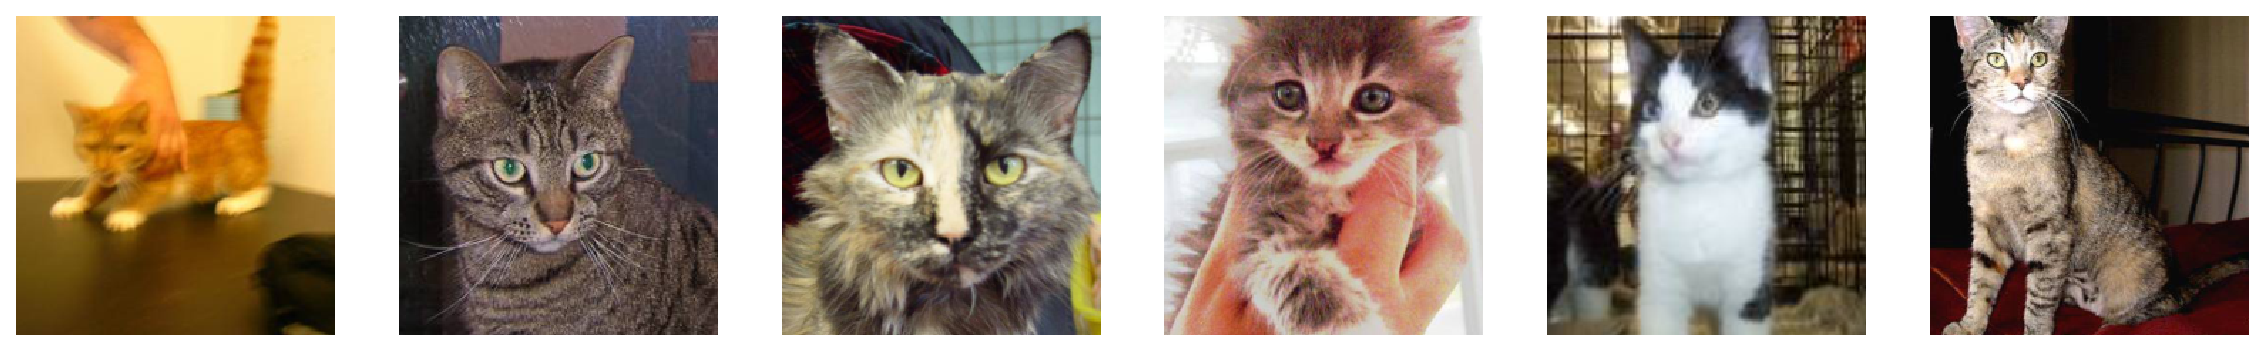

In [290]:
fig, axes = plt.subplots(figsize=(20,6), ncols=6)

for ii in range(6):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)

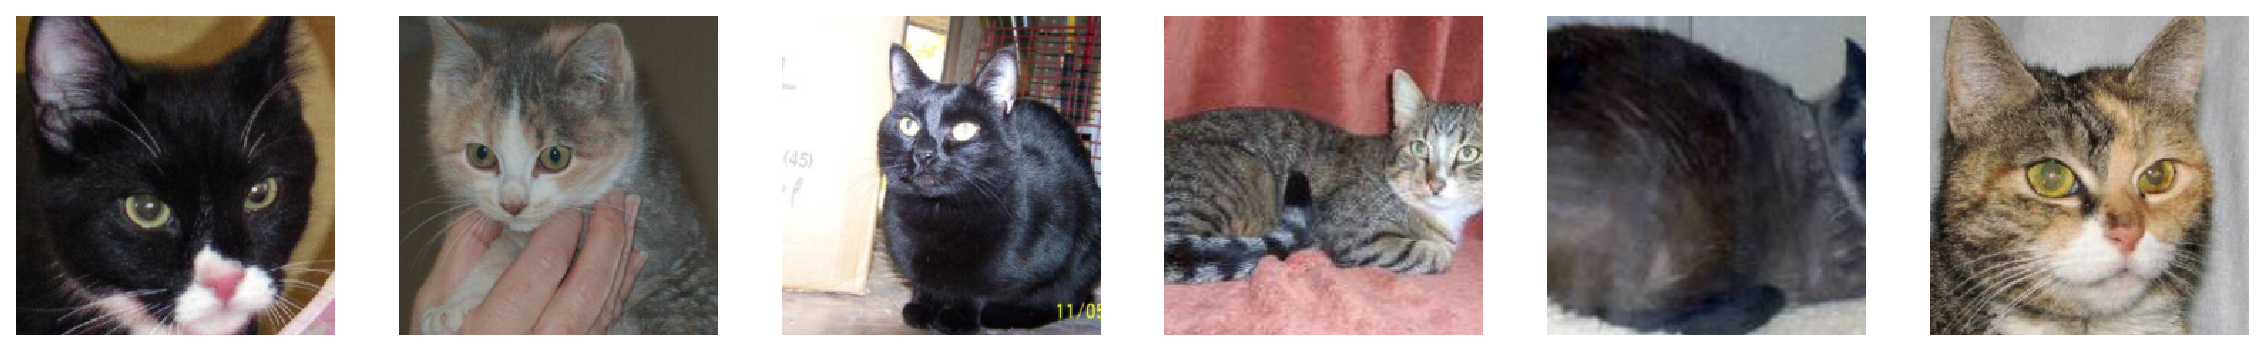

In [293]:
fig, axes = plt.subplots(figsize=(20,6), ncols=6)

for ii in range(6):
    ax = axes[ii]
    helper.imshow(images[6+ii], ax=ax, normalize=False)

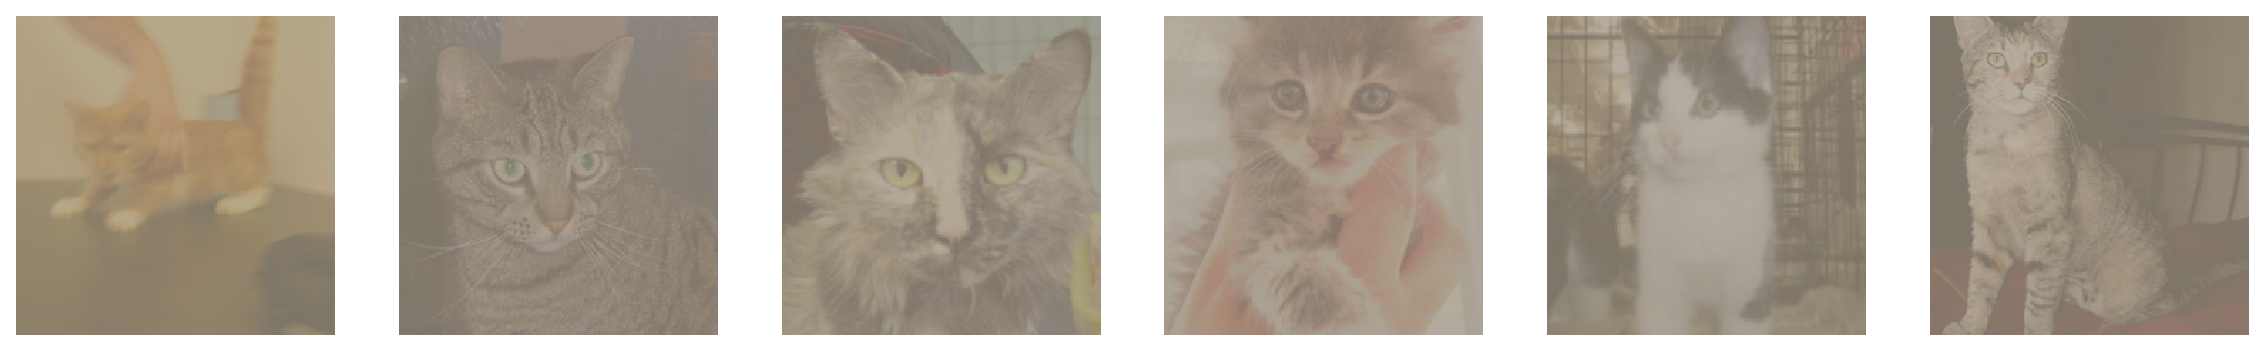

In [294]:
fig, axes = plt.subplots(figsize=(20,6), ncols=6)

for ii in range(6):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=True)

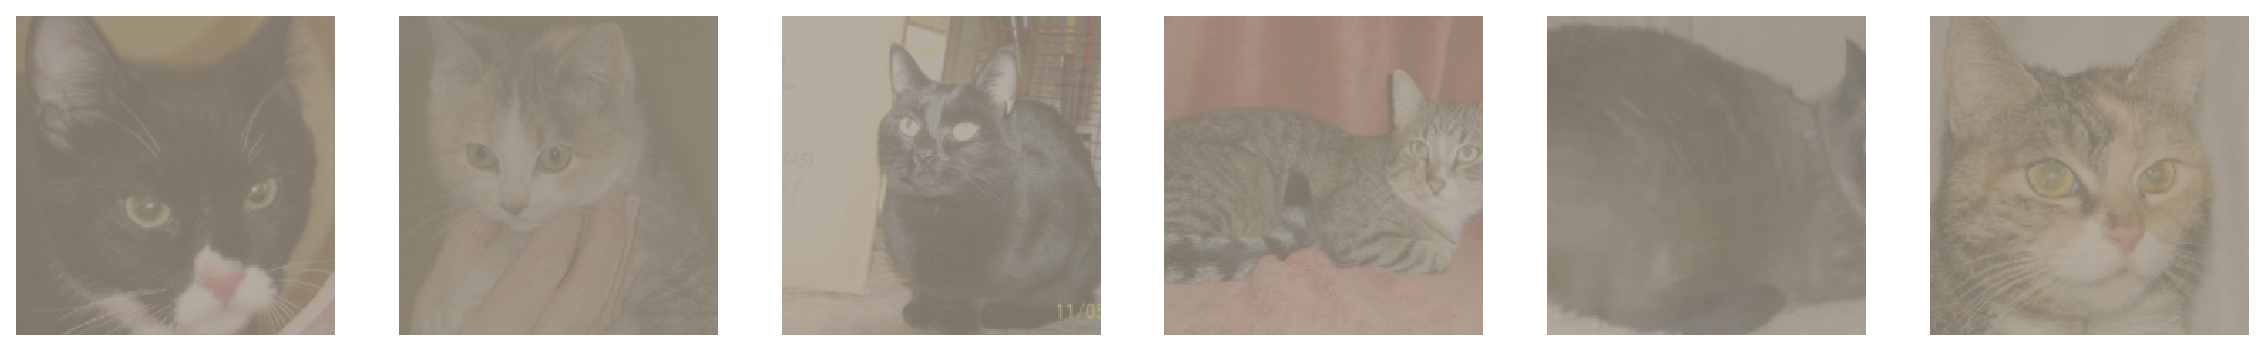

In [295]:
fig, axes = plt.subplots(figsize=(20,6), ncols=6)

for ii in range(6):
    ax = axes[ii]
    helper.imshow(images[6+ii], ax=ax, normalize=True)

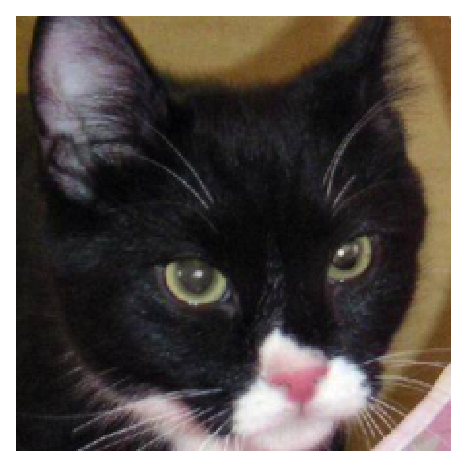

In [296]:
img = images[6].clone()
helper.imshow(img, normalize=False)

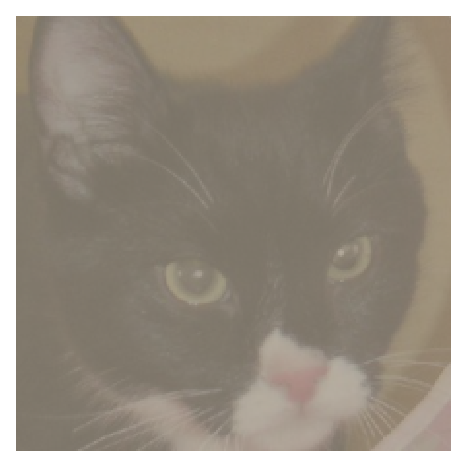

In [300]:
helper.imshow(img) # Uses default of normalize=True

**Google search recommendation for normalization is the same as used in the helper function:**
```
[0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
```

**This is what takes place in the helper function:**

```
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

```

The numbers `[0.485, 0.456, 0.406]` are the means, and `[0.229, 0.224, 0.225]` the standard deviations - of the red, green and blue channels. These must be on average over a number of images - try to verify this...

In [304]:
len(images)

32

In [302]:
img.shape

torch.Size([3, 224, 224])

In [303]:
img.numpy().transpose((1, 2, 0)).shape

(224, 224, 3)

In [299]:
img[:4,:4]

tensor([[[0.4392, 0.4510, 0.4392,  ..., 0.4745, 0.4627, 0.6157],
         [0.4353, 0.4431, 0.4392,  ..., 0.4706, 0.4471, 0.4784],
         [0.4157, 0.4157, 0.4118,  ..., 0.4745, 0.4941, 0.4353],
         [0.4314, 0.4314, 0.4353,  ..., 0.4706, 0.5137, 0.4588]],

        [[0.3294, 0.3412, 0.3373,  ..., 0.3294, 0.3333, 0.4902],
         [0.3255, 0.3333, 0.3373,  ..., 0.3176, 0.3020, 0.3373],
         [0.3059, 0.3059, 0.3098,  ..., 0.3098, 0.3333, 0.2784],
         [0.3216, 0.3216, 0.3294,  ..., 0.3020, 0.3412, 0.2863]],

        [[0.1333, 0.1451, 0.1373,  ..., 0.2000, 0.2196, 0.3922],
         [0.1333, 0.1451, 0.1451,  ..., 0.1804, 0.1765, 0.2235],
         [0.1176, 0.1176, 0.1176,  ..., 0.1686, 0.2000, 0.1451],
         [0.1373, 0.1373, 0.1412,  ..., 0.1569, 0.1961, 0.1490]]])

In [305]:
r_image = img[0]
g_image = img[1]
b_image = img[2]

In [306]:
r_image

tensor([[0.4392, 0.4510, 0.4392,  ..., 0.4745, 0.4627, 0.6157],
        [0.4353, 0.4431, 0.4392,  ..., 0.4706, 0.4471, 0.4784],
        [0.4157, 0.4157, 0.4118,  ..., 0.4745, 0.4941, 0.4353],
        ...,
        [0.0745, 0.0784, 0.0627,  ..., 0.7843, 0.7961, 0.8000],
        [0.0706, 0.0824, 0.0902,  ..., 0.7569, 0.7725, 0.7804],
        [0.0627, 0.0706, 0.0784,  ..., 0.7765, 0.7529, 0.7451]])

In [308]:
r_image.min(), r_image.max(), r_image.mean(), r_image.std() 

(tensor(0.0078), tensor(1.), tensor(0.2747), tensor(0.2487))

In [307]:
g_image

tensor([[0.3294, 0.3412, 0.3373,  ..., 0.3294, 0.3333, 0.4902],
        [0.3255, 0.3333, 0.3373,  ..., 0.3176, 0.3020, 0.3373],
        [0.3059, 0.3059, 0.3098,  ..., 0.3098, 0.3333, 0.2784],
        ...,
        [0.0667, 0.0706, 0.0549,  ..., 0.5686, 0.5922, 0.6078],
        [0.0627, 0.0745, 0.0824,  ..., 0.5412, 0.5725, 0.5961],
        [0.0549, 0.0627, 0.0706,  ..., 0.5569, 0.5529, 0.5569]])

In [309]:
g_image.min(), g_image.max(), g_image.mean(), g_image.std() 

(tensor(0.0078), tensor(1.), tensor(0.2405), tensor(0.2222))

In [310]:
b_image

tensor([[0.1333, 0.1451, 0.1373,  ..., 0.2000, 0.2196, 0.3922],
        [0.1333, 0.1451, 0.1451,  ..., 0.1804, 0.1765, 0.2235],
        [0.1176, 0.1176, 0.1176,  ..., 0.1686, 0.2000, 0.1451],
        ...,
        [0.0706, 0.0745, 0.0588,  ..., 0.6706, 0.6980, 0.7176],
        [0.0667, 0.0784, 0.0863,  ..., 0.6431, 0.6784, 0.7059],
        [0.0588, 0.0667, 0.0745,  ..., 0.6667, 0.6667, 0.6706]])

In [311]:
b_image.min(), b_image.max(), b_image.mean(), b_image.std() 

(tensor(0.0078), tensor(0.9961), tensor(0.2199), tensor(0.2116))

Get the mean and standard deviation of all dog and cat images

In [326]:
red_chan = []
gre_chan = []
blu_chan = []

dataloader = torch.utils.data.DataLoader(dataset, batch_size=128)
for images, labels in dataloader:
    for image in images:
        red_chan.append(image[0])
        gre_chan.append(image[1])
        blu_chan.append(image[2])

In [327]:
print(len(red_chan))
print()
print(red_chan[:3])

22500

[tensor([[0.9686, 0.9686, 0.9725,  ..., 0.9882, 0.9922, 0.9922],
        [0.9686, 0.9686, 0.9725,  ..., 0.9882, 0.9922, 0.9922],
        [0.9647, 0.9647, 0.9686,  ..., 0.9882, 0.9922, 0.9922],
        ...,
        [0.3020, 0.3020, 0.3020,  ..., 0.0902, 0.0902, 0.0980],
        [0.2941, 0.2941, 0.3020,  ..., 0.0863, 0.0824, 0.0784],
        [0.3020, 0.3020, 0.2980,  ..., 0.1216, 0.1020, 0.0941]]), tensor([[0.1490, 0.2431, 0.2863,  ..., 0.3137, 0.2824, 0.2392],
        [0.1373, 0.1961, 0.2431,  ..., 0.3020, 0.3137, 0.2627],
        [0.1255, 0.1412, 0.1725,  ..., 0.2863, 0.2784, 0.2471],
        ...,
        [0.0588, 0.0588, 0.0588,  ..., 0.3451, 0.3608, 0.3451],
        [0.0784, 0.0784, 0.0745,  ..., 0.3529, 0.3490, 0.3059],
        [0.0980, 0.1020, 0.0941,  ..., 0.3373, 0.3137, 0.2824]]), tensor([[0.1451, 0.1569, 0.1373,  ..., 0.5412, 0.5373, 0.5373],
        [0.1373, 0.1216, 0.1176,  ..., 0.5373, 0.5373, 0.5373],
        [0.1255, 0.1294, 0.1294,  ..., 0.5373, 0.5373, 0.5373],
  

In [329]:
red_channels = torch.cat(red_chan, dim=0)
green_channels = torch.cat(gre_chan, dim=0)
blue_channels = torch.cat(blu_chan, dim=0)

In [334]:
red_channels[:2]

tensor([[0.9686, 0.9686, 0.9725, 0.9765, 0.9765, 0.9804, 0.9804, 0.9765, 0.9725,
         0.9765, 0.9765, 0.9804, 0.9804, 0.9804, 0.9804, 0.9843, 0.9882, 0.9922,
         0.9882, 0.9882, 0.9843, 0.9843, 0.9843, 0.9882, 0.9843, 0.9725, 0.9647,
         0.9529, 0.9373, 0.9333, 0.9216, 0.9059, 0.8902, 0.8588, 0.8353, 0.8157,
         0.8078, 0.8039, 0.7961, 0.7882, 0.7922, 0.7961, 0.7961, 0.8000, 0.8039,
         0.8000, 0.8078, 0.8157, 0.8118, 0.7843, 0.7451, 0.6706, 0.6431, 0.6314,
         0.6510, 0.6863, 0.7098, 0.7294, 0.7725, 0.8235, 0.8588, 0.8784, 0.8980,
         0.9020, 0.8941, 0.9059, 0.9098, 0.9216, 0.9255, 0.9255, 0.9294, 0.9333,
         0.9333, 0.9294, 0.9333, 0.9294, 0.9216, 0.9098, 0.8941, 0.8824, 0.8627,
         0.8627, 0.9255, 0.9608, 0.9647, 0.9843, 0.9922, 0.9961, 1.0000, 0.9922,
         0.9922, 0.9961, 1.0000, 1.0000, 0.9961, 0.9961, 0.9961, 0.9961, 0.9961,
         0.9961, 0.9961, 0.9961, 0.9961, 0.9961, 0.9961, 0.9961, 0.9961, 0.9961,
         0.9961, 0.9961, 0.9

In [332]:
red_channels.min(), green_channels.min(), blue_channels.min()

(tensor(0.), tensor(0.), tensor(0.))

In [333]:
red_channels.max(), green_channels.max(), blue_channels.max()

(tensor(1.), tensor(1.), tensor(1.))

In [330]:
red_channels.mean(), green_channels.mean(), blue_channels.mean()

(tensor(0.4883), tensor(0.4508), tensor(0.4118))

In [331]:
red_channels.std(), green_channels.std(), blue_channels.std()

(tensor(0.2589), tensor(0.2511), tensor(0.2519))

Not the same as `[0.485, 0.456, 0.406], [0.229, 0.224, 0.225]`, the means are similar but the standard deviations are higher...

Applying the mean and standard deviation of a single image to itself, the classic approach is (image - mean) / std

In [340]:
img1_r = (img[0] - img[0].mean()) / img[0].std()
img1_g = (img[1] - img[1].mean()) / img[1].std()
img1_b = (img[2] - img[2].mean()) / img[2].std()

test_img1 = torch.cat((img1_r.unsqueeze(0), 
                       img1_g.unsqueeze(0),
                       img1_b.unsqueeze(0)), 0)

In [509]:
img1_r.min(), img1_r.max(), img1_r.mean(), img1_r.std()

(tensor(-1.0727), tensor(2.9160), tensor(2.2188e-06), tensor(1.))

In [510]:
img1_g.min(), img1_g.max(), img1_g.mean(), img1_g.std()

(tensor(-1.0471), tensor(3.4188), tensor(2.3647e-06), tensor(1.0000))

In [511]:
img1_b.min(), img1_b.max(), img1_b.mean(), img1_b.std()

(tensor(-1.0024), tensor(3.6681), tensor(3.0459e-06), tensor(1.))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


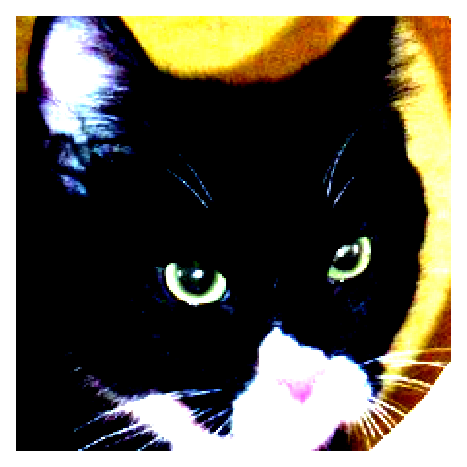

In [506]:
helper.imshow(test_img1, normalize=False)

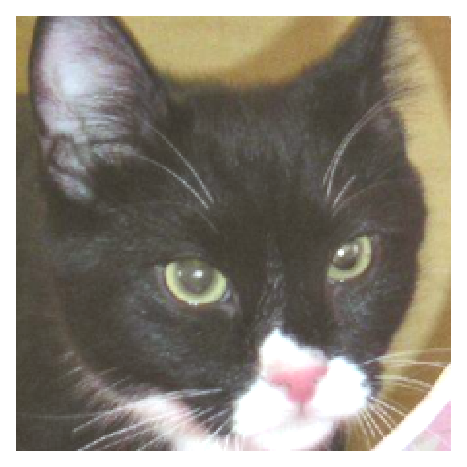

In [347]:
helper.imshow(test_img1, normalize=True)

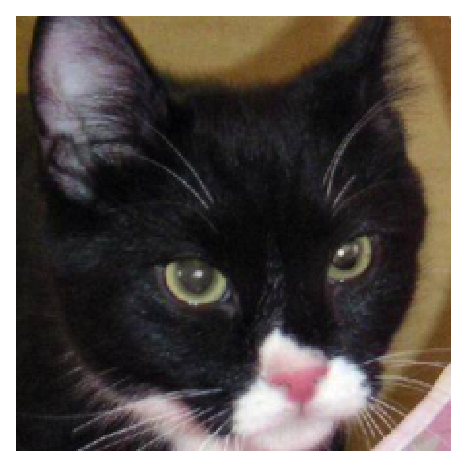

In [507]:
helper.imshow(img, normalize=False)

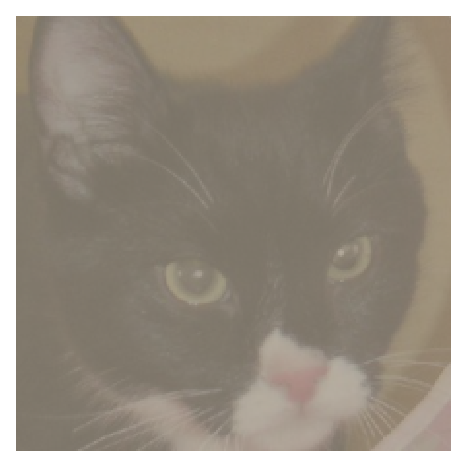

In [508]:
helper.imshow(img, normalize=True)

**Try also the helper function approach, which is std * image + mean**

In [344]:
img2_r = img[0].std() * img[0] + img[0].mean() 
img2_g = img[1].std() * img[1] + img[1].mean() 
img2_b = img[2].std() * img[2] + img[2].mean() 

test_img2 = torch.cat((img2_r.unsqueeze(0), 
                       img2_g.unsqueeze(0),
                       img2_b.unsqueeze(0)), 0)

In [502]:
img2_r.min(), img2_r.max(), img2_r.mean(), img2_r.std()

(tensor(0.2766), tensor(0.5234), tensor(0.3430), tensor(0.0619))

In [503]:
img2_g.min(), img2_g.max(), img2_g.mean(), img2_g.std()

(tensor(0.2422), tensor(0.4626), tensor(0.2939), tensor(0.0494))

In [504]:
img2_b.min(), img2_b.max(), img2_b.mean(), img2_b.std()

(tensor(0.2216), tensor(0.4307), tensor(0.2665), tensor(0.0448))

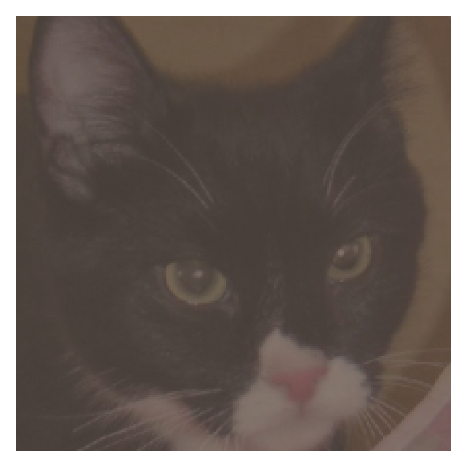

In [505]:
helper.imshow(test_img2, normalize=False)

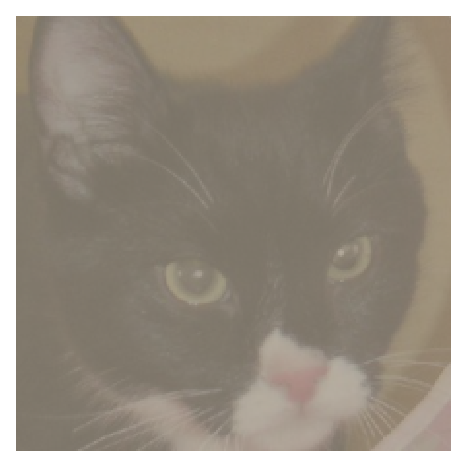

In [346]:
helper.imshow(img, normalize=True)

The second image takes the helper function approach, and its close to the standardized approach taken by the helper function. Therefore, concluding that the correct way to normalise is according to the helper function: std * image + mean

Apply the actual means and standard deviations obtained over all of the images:

In [348]:
img3_r = 0.2589 * img[0] + 0.4883 
img3_g = 0.2511 * img[1] + 0.4508 
img3_b = 0.2519 * img[2] + 0.4118 

test_img3 = torch.cat((img3_r.unsqueeze(0), 
                       img3_g.unsqueeze(0),
                       img3_b.unsqueeze(0)), 0)

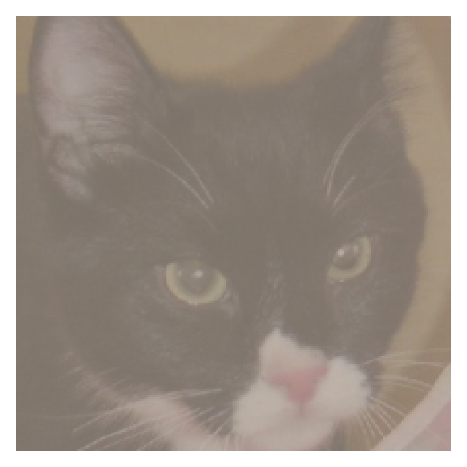

In [349]:
helper.imshow(test_img3, normalize=False)

Vitually identical with the standard values used in the helper function

**Do the same with the "standard" numbers** `[0.485, 0.456, 0.406], [0.229, 0.224, 0.225]` 

In [513]:
img4_r = 0.229 * img[0] + 0.485 
img4_g = 0.224 * img[1] + 0.456 
img4_b = 0.225 * img[2] + 0.406 

test_img4 = torch.cat((img4_r.unsqueeze(0), 
                       img4_g.unsqueeze(0),
                       img4_b.unsqueeze(0)), 0)

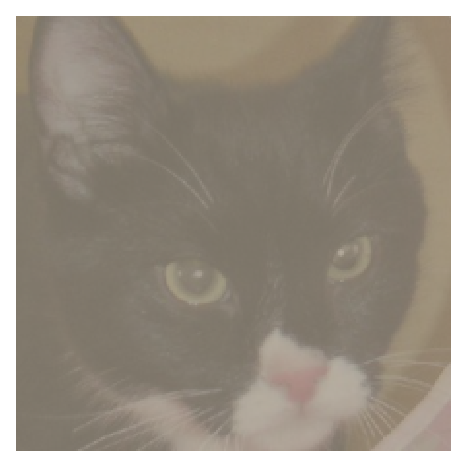

In [514]:
helper.imshow(test_img4, normalize=False)

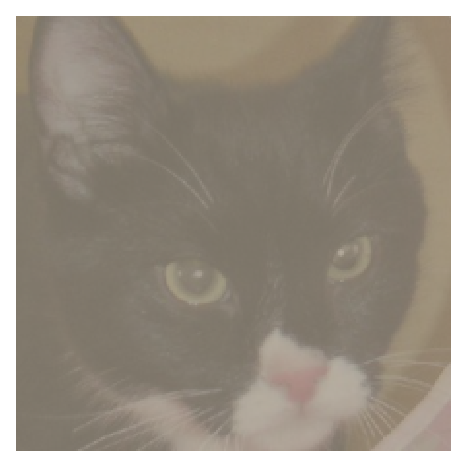

In [515]:
helper.imshow(img, normalize=True)

If you loaded the data correctly, you should see something like this (your image will be different):

<img src='assets/cat_cropped.png' width=244>

## Data Augmentation

A common strategy for training neural networks is to introduce randomness in the input data itself. For example, you can randomly rotate, mirror, scale, and/or crop your images during training. This will help your network generalize as it's seeing the same images but in different locations, with different sizes, in different orientations, etc.

To randomly rotate, scale and crop, then flip your images you would define your transforms like this:

```python
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5], 
                                                            [0.5, 0.5, 0.5])])
```

You'll also typically want to normalize images with `transforms.Normalize`. You pass in a list of means and list of standard deviations, then the color channels are normalized like so

```input[channel] = (input[channel] - mean[channel]) / std[channel]```

Subtracting `mean` centers the data around zero and dividing by `std` squishes the values to be between -1 and 1. Normalizing helps keep the network work weights near zero which in turn makes backpropagation more stable. Without normalization, networks will tend to fail to learn.

You can find a list of all [the available transforms here](http://pytorch.org/docs/0.3.0/torchvision/transforms.html). When you're testing however, you'll want to use images that aren't altered (except you'll need to normalize the same way). So, for validation/test images, you'll typically just resize and crop.

>**Exercise:** Define transforms for training data and testing data below.

**See discussion below that confirms that its appropriate to apply Normalisation here...**

In [487]:
train_tfms = transforms.Compose([
        transforms.Resize(255),
#        transforms.Pad(6, padding_mode='symmetric'), 
        transforms.RandomRotation(5),
        transforms.RandomHorizontalFlip(),
        transforms.RandomResizedCrop(224, scale=(0.96, 1.0), ratio=(0.95, 1.05)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [495]:
train_tfms = transforms.Compose([
        transforms.Resize(255),
        transforms.RandomRotation(5),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [496]:
test_tfms = transforms.Compose([
        transforms.Resize(255),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [497]:
# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_tfms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_tfms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

In [ ]:
# change this to the trainloader or testloader 
data_iter = iter(trainloader)
images, labels = next(data_iter)

Start with Normalize=False into the helper function...

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


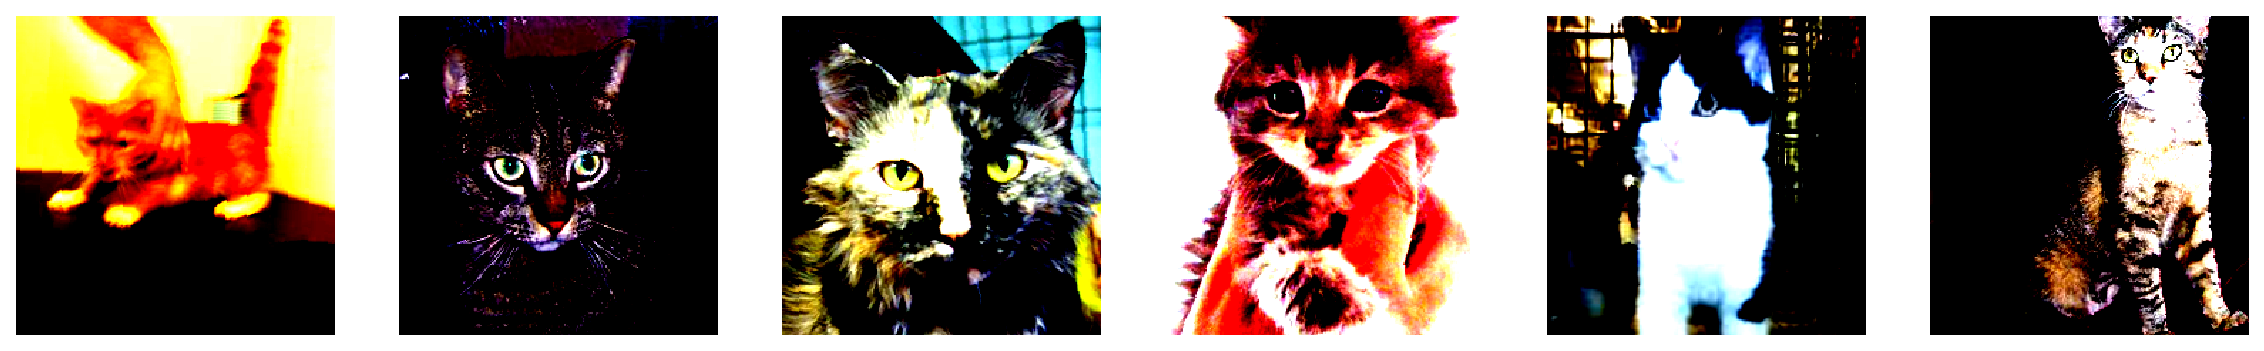

In [500]:
fig, axes = plt.subplots(figsize=(20,6), ncols=6)

for ii in range(6):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)

Now use Normalize=True

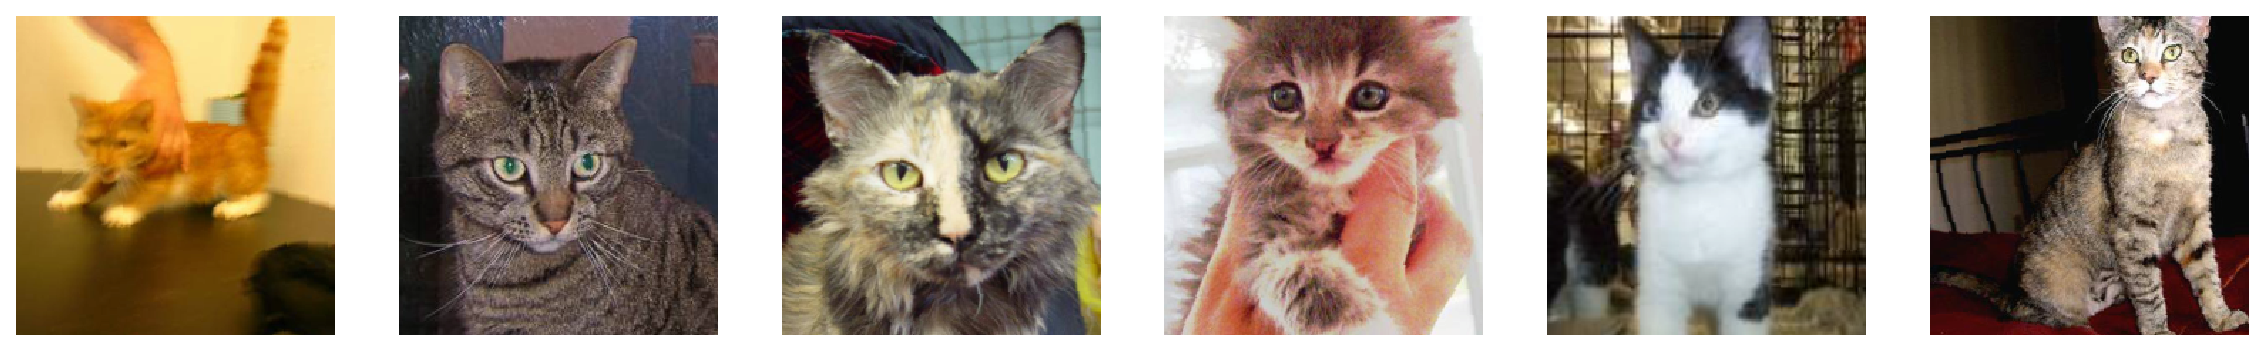

In [501]:
fig, axes = plt.subplots(figsize=(20,6), ncols=6)

for ii in range(6):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=True)

The first six original images, no augmentation or normalization:
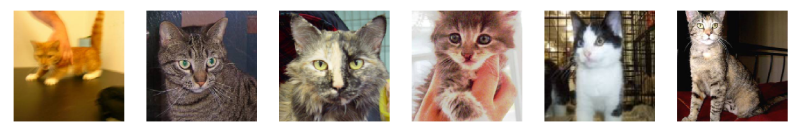    

Close up comparisons of one image for pasting into the Slack discussion below...

In [516]:
img_tf = images[6].clone()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


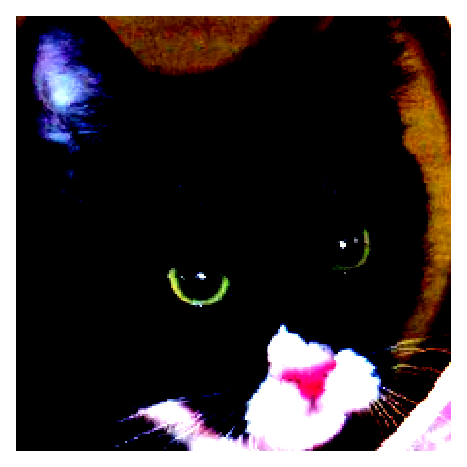

In [520]:
helper.imshow(img_tf, normalize=False)

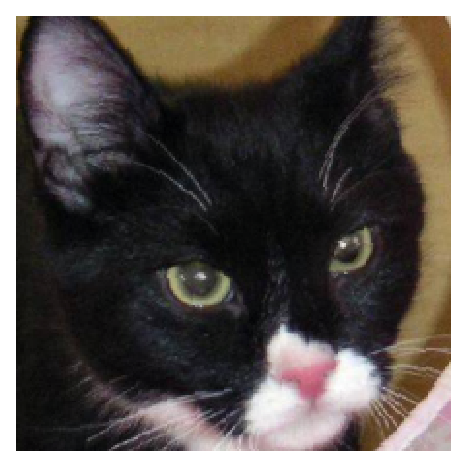

In [521]:
helper.imshow(img_tf, normalize=True)

**Conclusion:** _We need to use Normalize=True with the helper function when we use transforms.Normalize_

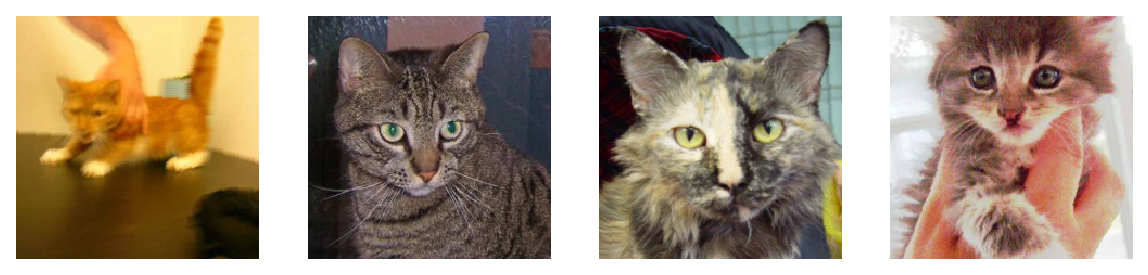

In [522]:
fig, axes = plt.subplots(figsize=(10,4), ncols=4)

for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=True)

In [ ]:
data_iter = iter(testloader)
images, labels = next(data_iter)

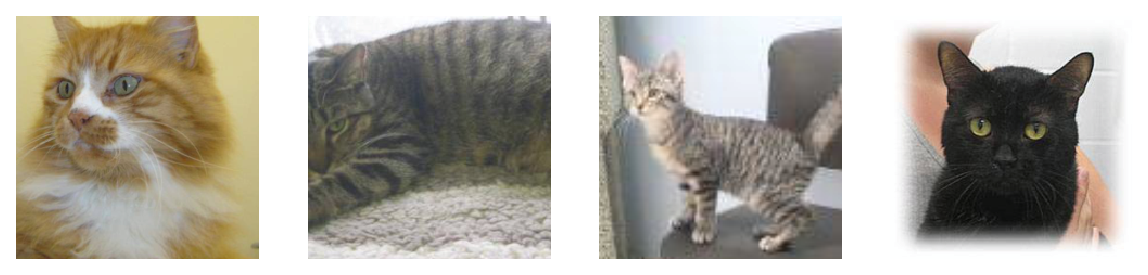

In [524]:
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=True)

Your transformed images should look something like this.

<center>Training examples:</center>
<img src='assets/train_examples.png' width=500px>

<center>Testing examples:</center>
<img src='assets/test_examples.png' width=500px>

At this point you should be able to load data for training and testing. Now, you should try building a network that can classify cats vs dogs. This is quite a bit more complicated than before with the MNIST and Fashion-MNIST datasets. To be honest, you probably won't get it to work with a fully-connected network, no matter how deep. These images have three color channels and at a higher resolution (so far you've seen 28x28 images which are tiny).

In the next part, I'll show you how to use a pre-trained network to build a model that can actually solve this problem.

In [ ]:
# Optional TODO: Attempt to build a network to classify cats vs dogs from this dataset

## Discussion from slack forum regarding this:


_**What should normalized images look like? And should we be instructing the transforms function to normalize?**_

If I take the clue from the helper.imshow function then we would expect normalization to produce a low contrast image with ranges of the values in each of the RGB layers constrained to be between 0 and 1. I can reproduce this by taking an image and applying the mean and standard deviations of each of its layers to the layer using the approach (taken by the helper function) of std * image + mean. I can exactly reproduce the effect of the helper function if I use its numbers of RGB means and std of `[0.485, 0.456, 0.406]` and `[0.229, 0.224, 0.225]`. However, these parameters when passed to transforms in the form of `transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])` produces instead images with greatly exaggerated colors with RGB values mostly ranging between -1 and 1 but with some of the values exceeding the boundaries, producing a clipping warning by imshow.

Examples of normal image and normalization applied by the helper function (left-hand 2 images), and resulting image (after using transforms.Normalize) and normalization applied to it (right-hand 2 images).  Note that the odd contrasty image "normalizes" back to the original appearance.

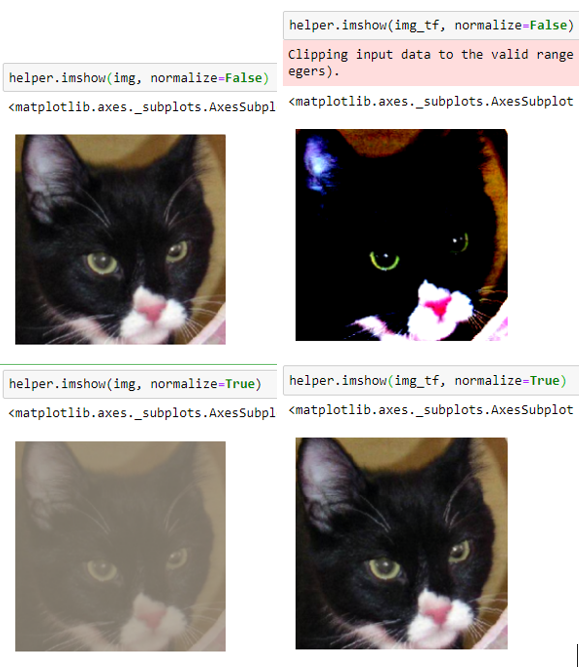

**2 replies**  

Felipe T   
Image normalisation is actually different from the feature normalisation that is done by the transform. Image normalisation is useful for enhancing the contrast of an image, for example. In this case, we usually tend to make the lowest pixel value in the image to be 0 and the highest to be 1, because that's the range of values that pixels can have (in float format or 0 to 255 in 8-bit unsigned int representation). In the other hand, feature normalisation does not constrain the feature value between 0 and 1. It supposes that the variable is a random variable with a gaussian distribution. Then subtracting the mean and dividing by the standard deviation makes the variable normally distributed with 0 mean and unitary standard deviation. But its value can still range from -infinity to +infinity. The feature normalisation transform is done to the data, because sometimes you will have a feature 1 that has a range of say 100 to 10000 and another feature 2 that ranges from say 0 to 0.01. In this case, the order of magnitude of the weights of the features 1 and 2 will be very different. And this can lead to poor learning performance of your model.



Chris Palmer   
Thanks for explaining that. It also confirms my reading that the formula used for feature normalization is (image - mean) / std, whereas the formula applied by the helper function to get a "normalized" image reverses this by using  std * image + mean.

I conclude therefore that I should apply the feature normalisation, but when using the helper function to view images processed using feature normalization I will need to use the normalize=True parameter (the default value) to see the image in a normal range. And... that using normalise=True in the helper function is really only relevant if images have been transformed via transforms.Normalize.


**Experiment to observe behaviour when the _actual_ mean and std are supplied...**

In [568]:
train_tfms = transforms.Compose([
        transforms.Resize(255),
   #     transforms.Pad(24, padding_mode='edge'), 
        transforms.RandomRotation(5),
        transforms.RandomHorizontalFlip(),
        transforms.RandomResizedCrop(224, scale=(0.96, 1.0), ratio=(0.95, 1.05)),
   #     transforms.Resize(255),
        transforms.ToTensor(),
        transforms.Normalize([0.4883, 0.4508, 0.4118], [0.2589, 0.2511, 0.2519])
])

In [569]:
test_tfms = transforms.Compose([
        transforms.Resize(255),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.4883, 0.4508, 0.4118], [0.2589, 0.2511, 0.2519])
])

In [570]:
# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_tfms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_tfms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


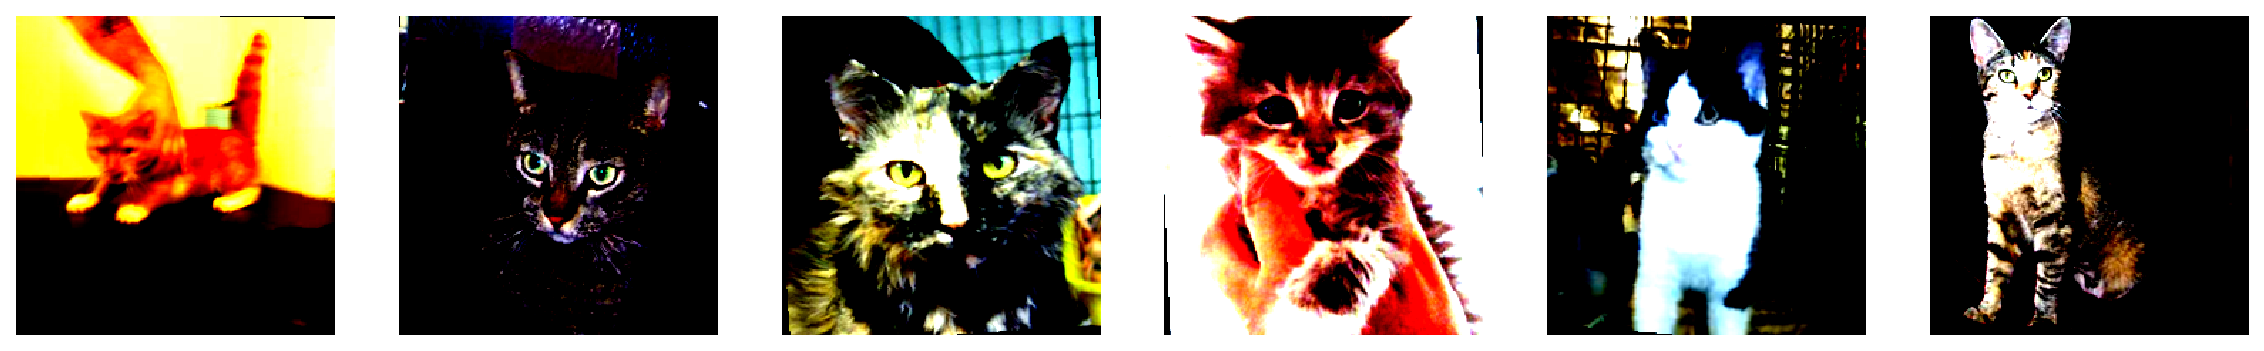

In [571]:
# change this to the trainloader or testloader 
data_iter = iter(trainloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(20,6), ncols=6)

for ii in range(6):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)

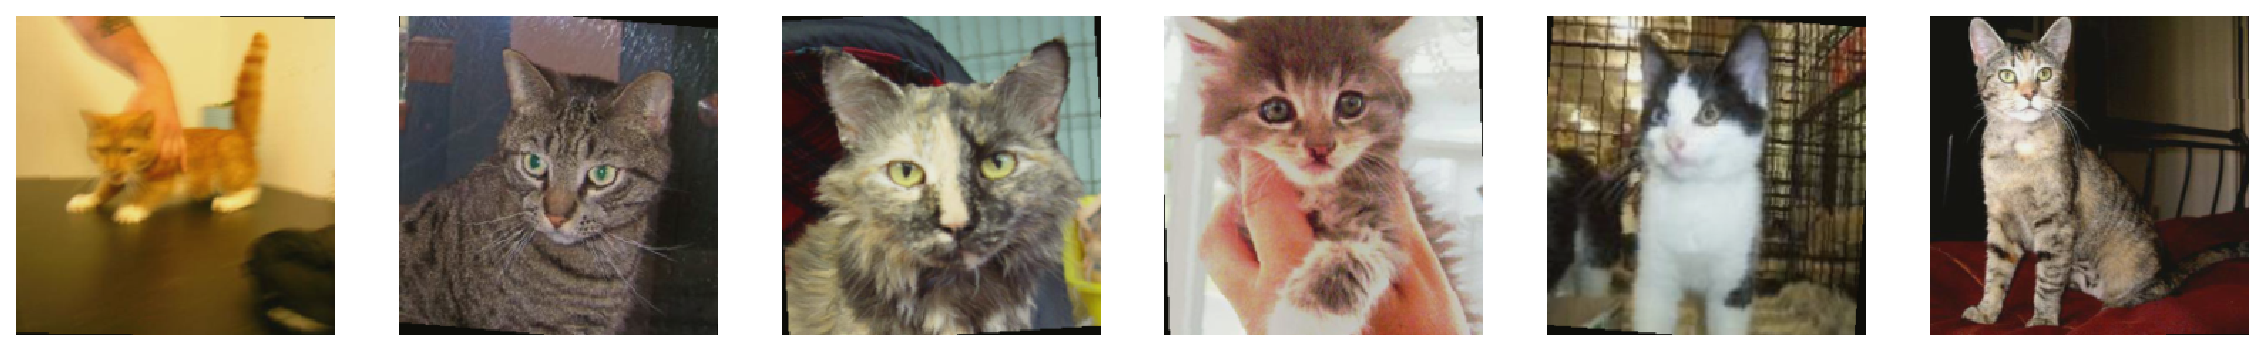

In [572]:
fig, axes = plt.subplots(figsize=(20,6), ncols=6)

for ii in range(6):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=True)

The first six original images, no augmentation or normalization:
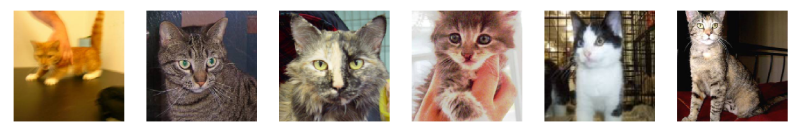    